<a href="https://colab.research.google.com/github/menna03/Introduction-To-Data-Science-Final-Project-/blob/main/Introduction_to_data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter

In [ ]:
fuelData = pd.read_csv('fuel.csv')
weatherData= pd.read_csv('weather.csv')
salesData = pd.read_csv('sales.csv')

fuel=pd.DataFrame(fuelData)
weather=pd.DataFrame(weatherData)
sales=pd.DataFrame(salesData)

 # Question One [Data Cleaning]

## fuel data cleaning

In [ ]:
fuel.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [ ]:
fuel.isna().sum()* 100 / len(fuel)
#check Nans

Store         0.0
Date          0.0
Fuel_Price    0.0
dtype: float64

In [ ]:
negative_num = list(filter(lambda x: (x<0),fuel['Fuel_Price'] ))
negative_num
#check negative values in fuel price

[]

In [ ]:
fuel
#just to view the data

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
...,...,...,...
8185,45,2013-06-28,3.639
8186,45,2013-07-05,3.614
8187,45,2013-07-12,3.614
8188,45,2013-07-19,3.737


In [ ]:
fuel["Date"]=pd.to_datetime(fuel['Date'])
fuel["Date"]
#just a check that it reads as dates

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
8185   2013-06-28
8186   2013-07-05
8187   2013-07-12
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

## Weather data cleaning

In [ ]:
weather.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [ ]:
weather.isna().sum()* 100 / len(weather)
#check Nans

Store          0.0
Date           0.0
Temperature    0.0
dtype: float64

In [ ]:
weather
#just to view the data

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


In [ ]:
weather["Date"]=pd.to_datetime(weather['Date'])
weather["Date"]
#just a check that it reads as dates

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
8185   2013-06-28
8186   2013-07-05
8187   2013-07-12
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

## Sales data cleaning

In [ ]:
sales.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [ ]:
sales.isna().sum()* 100 / len(sales)
#check Nans

Store           0.0
Category        0.0
Date            0.0
Weekly_Sales    0.0
Holiday         0.0
dtype: float64

In [ ]:
sales['Weekly_Sales']!=0
#check if theres sales =0

0         True
1         True
2         True
3         True
4         True
          ... 
421565    True
421566    True
421567    True
421568    True
421569    True
Name: Weekly_Sales, Length: 421570, dtype: bool

In [ ]:
negative_num = list(filter(lambda x: (x<0),sales['Weekly_Sales'] ))
negative_num.count
#check negative values in weekly Sales price

<function list.count(value, /)>

In [ ]:
sales['Weekly_Sales'] = np.where(sales['Weekly_Sales'] < 0, np.nan , sales['Weekly_Sales'])
sales['Weekly_Sales']
#removes weekly sales negative values with nans

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [ ]:
sales.isna().sum()* 100 / len(sales)
#check Nans

Store           0.000000
Category        0.000000
Date            0.000000
Weekly_Sales    0.304813
Holiday         0.000000
dtype: float64

In [ ]:
sales=sales.dropna()
sales
#dropping this nan values

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
sales.isna().sum()* 100 / len(sales)
#check Nans again to mae sure that the function workes

Store           0.0
Category        0.0
Date            0.0
Weekly_Sales    0.0
Holiday         0.0
dtype: float64

In [ ]:
negative_num = list(filter(lambda x: (x<0),sales['Weekly_Sales'] ))
print(negative_num)
#check negative values in weekly Sales price

[]


In [ ]:
sales
#just to view the data

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
sales["Date"]=pd.to_datetime(sales['Date'])
sales["Date"]
#just a check that it reads as dates

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 420285, dtype: datetime64[ns]

## describing the data

In [ ]:
fuel.describe()
#neglect the store describtion becuse it doesnt have meaning
#the fuel prices is near from each other

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


In [ ]:
weather.describe()
#neglect the store describtion becuse it doesnt have meaning
#the range of the weather data is big compared to the fuel prices data

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


In [ ]:
sales.describe()
#neglect the store describtion becuse it doesnt have meaning
#the range is so big and the mean also

,Store,Category,Weekly_Sales
count,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773
std,12.787213,30.507197,22728.500149
min,1.000000,1.000000,0.000000
25%,11.000000,18.000000,2117.560000
50%,22.000000,37.000000,7659.090000
75%,33.000000,74.000000,20268.380000
max,45.000000,99.000000,693099.360000


## Merging the Data

In [ ]:
superMerge0= fuel.merge(weather, on=['Date','Store'])
superMerge= superMerge0.merge(sales, on=['Date','Store'])
superMerge

,Store,Date,Fuel_Price,Temperature,Category,Weekly_Sales,Holiday
0,1,2010-02-05,2.572,42.31,1,24924.50,False
1,1,2010-02-05,2.572,42.31,2,50605.27,False
2,1,2010-02-05,2.572,42.31,3,13740.12,False
3,1,2010-02-05,2.572,42.31,4,39954.04,False
4,1,2010-02-05,2.572,42.31,5,32229.38,False
...,...,...,...,...,...,...,...
420280,45,2012-10-26,3.882,58.85,93,2487.80,False
420281,45,2012-10-26,3.882,58.85,94,5203.31,False
420282,45,2012-10-26,3.882,58.85,95,56017.47,False
420283,45,2012-10-26,3.882,58.85,97,6817.48,False


In [ ]:
superMerge.shape

(420285, 7)

In [ ]:
superMerge.duplicated().sum()
#check for duplicates

0

In [ ]:
superMerge.dtypes
#to see the data types

Store                    int64
Date            datetime64[ns]
Fuel_Price             float64
Temperature            float64
Category                 int64
Weekly_Sales           float64
Holiday                   bool
dtype: object

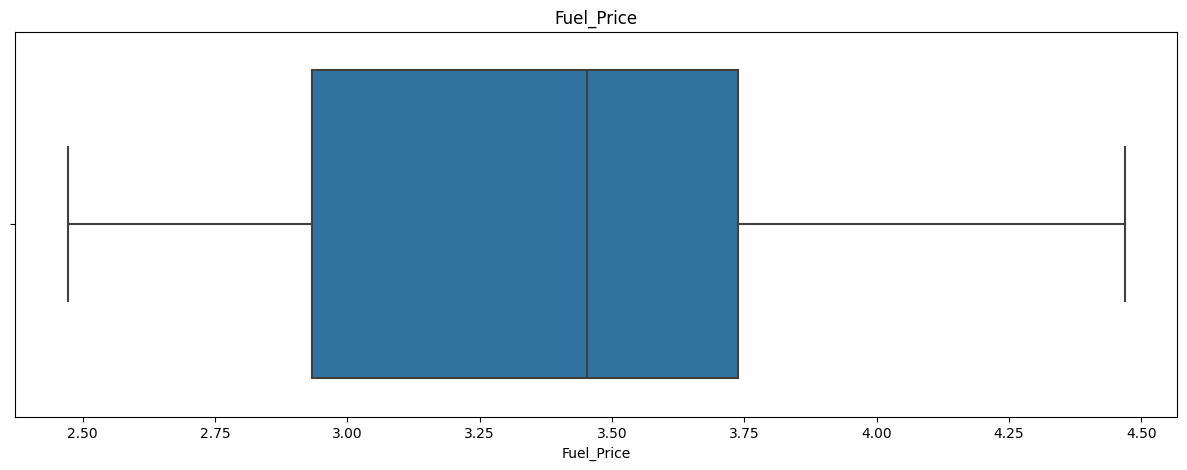

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Fuel_Price')
sns.boxplot(data = superMerge, x = "Fuel_Price");
plt.show()

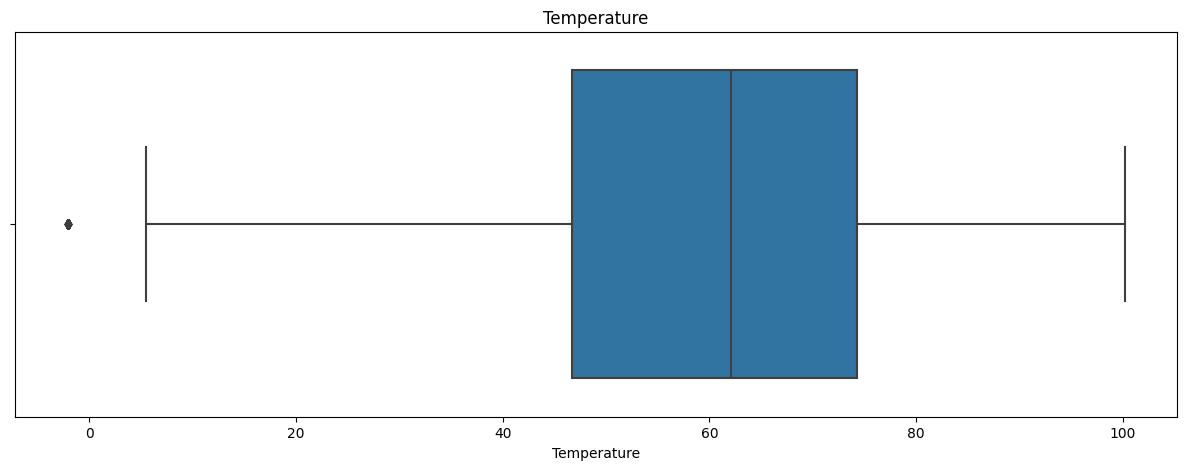

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.title('Temperature')
sns.boxplot(data = superMerge, x = "Temperature");
plt.show()

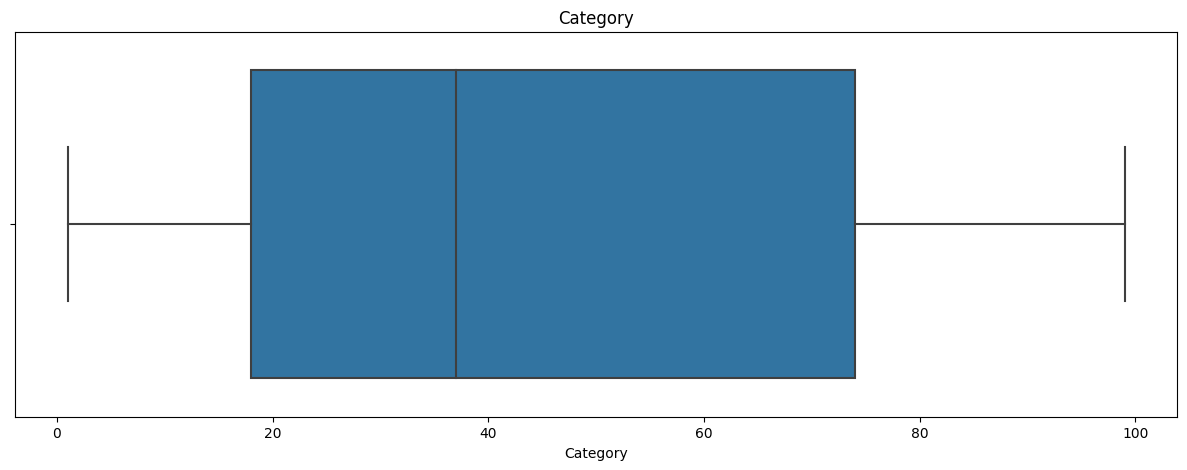

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Category')
sns.boxplot(data = superMerge, x = "Category");
plt.show()

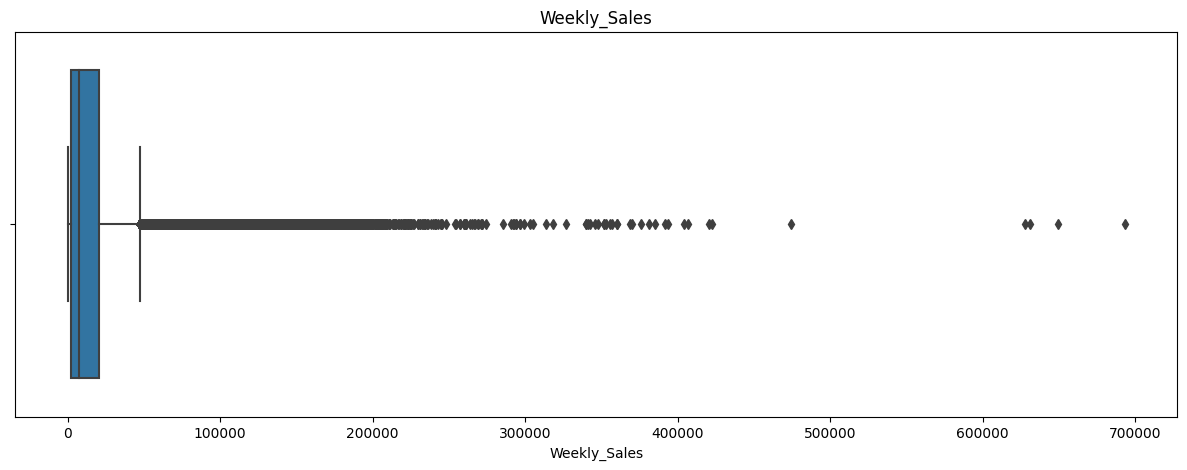

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Weekly_Sales')
sns.boxplot(data = superMerge, x = "Weekly_Sales");
plt.show()

In [ ]:
superMerge.isna().sum()* 100 / len(superMerge)

Store           0.0
Date            0.0
Fuel_Price      0.0
Temperature     0.0
Category        0.0
Weekly_Sales    0.0
Holiday         0.0
dtype: float64

# Question Two [Visualization]

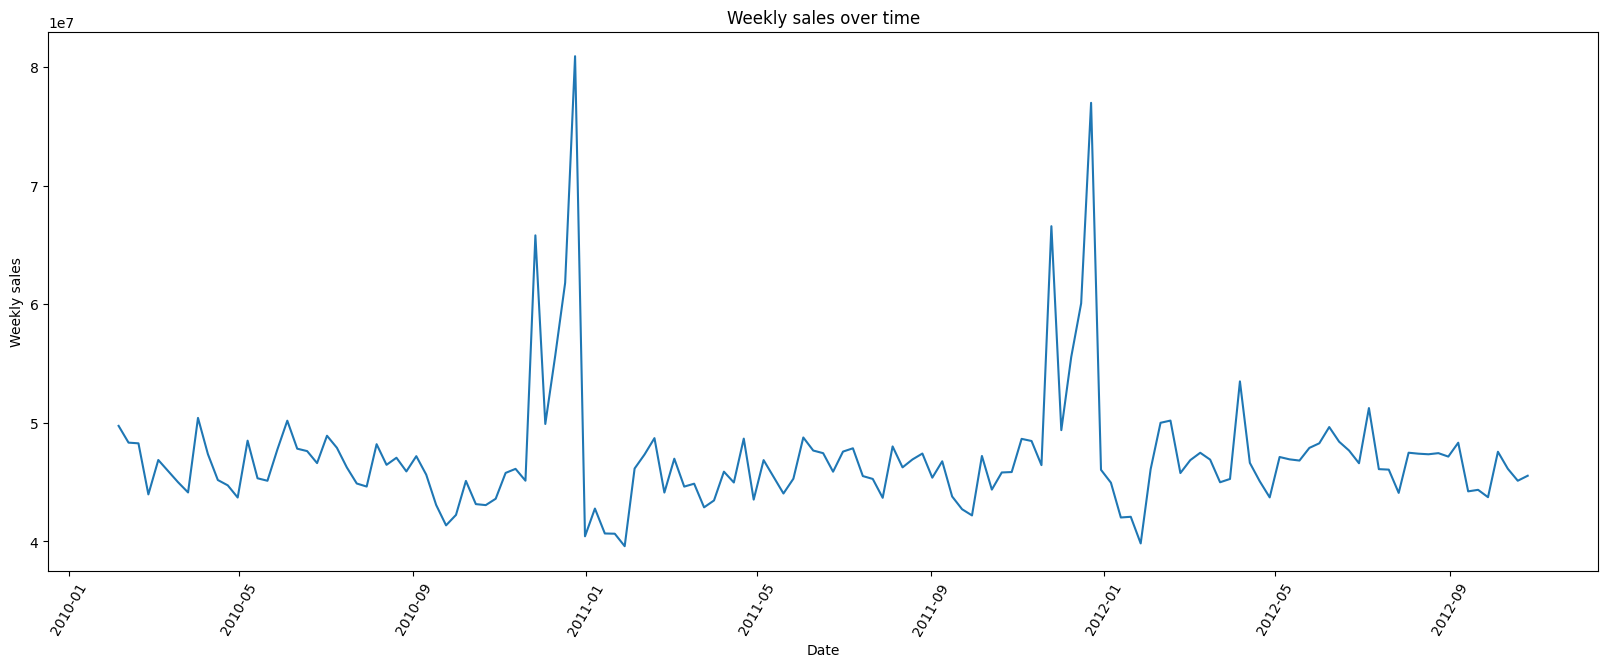

In [ ]:
# 1. make a chart to illustrate if weekly sales are increasing or decreasing over time.
plt.figure(figsize=(20,7))
salesChange = superMerge.groupby('Date')['Weekly_Sales'].sum()
plt.plot(salesChange.index, salesChange.values)
plt.title('Weekly sales over time')
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.xticks(rotation=60)
plt.show()

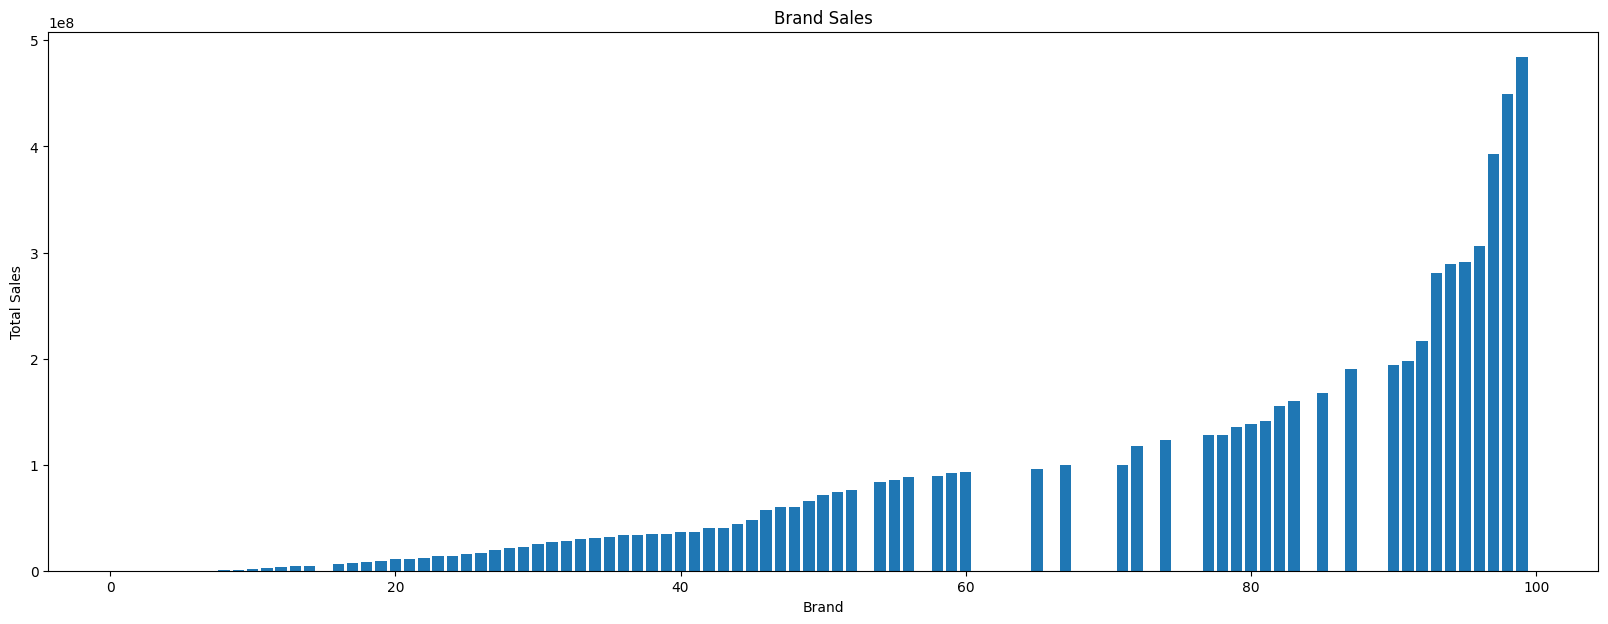

In [ ]:
# 2. Make a chart to show how much each brand sells.
plt.figure(figsize=(20,7))
brand_sales = superMerge.groupby('Category')['Weekly_Sales'].sum()
plt.bar(brand_sales.index,sorted( brand_sales.values))
plt.title('Brand Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# 3.Determine the top ten selling stores.
store_sales = sales.groupby("Store")["Weekly_Sales"].sum()
top_ten_stores = store_sales.sort_values(ascending=False).head(10)
top_ten_stores

Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64

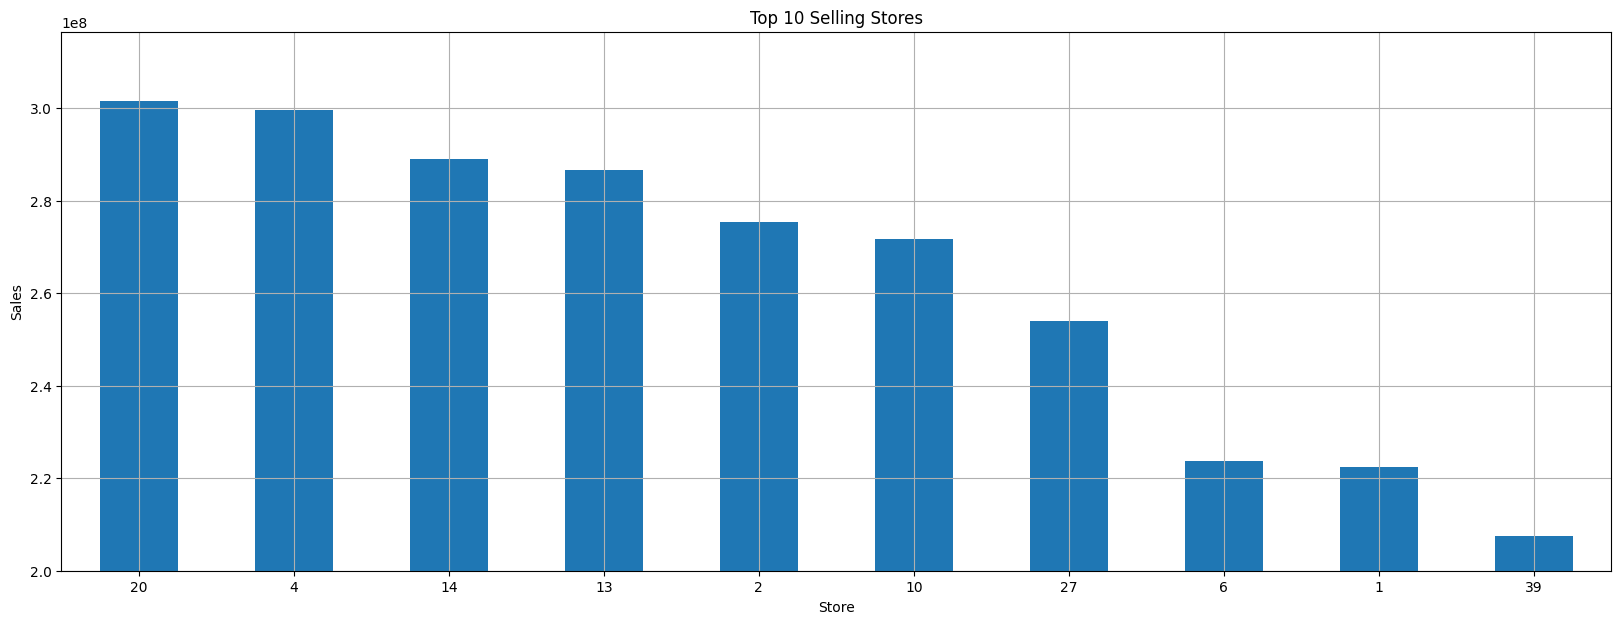

In [ ]:
#4. Make a histogram to show the top 10 stores sales.
plt.figure(figsize=(20,7))
top_ten_stores.plot(kind="bar")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.title("Top 10 Selling Stores")
plt.ylim(200_000_000)
plt.xticks(rotation=0)
plt.grid()
plt.show()


In [ ]:
# 5. Create a chart that compares average weekly sales for the top ten selling stores
#during holidays and non-holidays.
HolidaySales = superMerge[superMerge['Holiday']==True]
NonHolidaySales = superMerge[superMerge['Holiday']==False]
HolidaySalesAvg = HolidaySales.groupby('Store')['Weekly_Sales'].mean().nlargest(10)
NonHolidaySalesAvg = NonHolidaySales.groupby('Store')['Weekly_Sales'].mean().nlargest(10)
combined_data = pd.concat([HolidaySalesAvg, NonHolidaySalesAvg], axis=1)
combined_data.columns = ['Holiday Avg Sales', 'Non-Holiday Avg Sales']

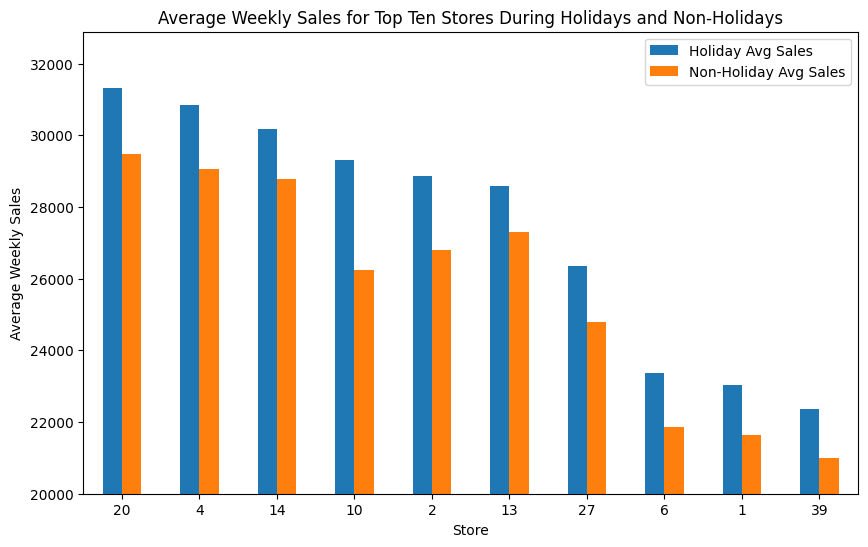

In [ ]:
combined_data.plot(kind='bar',figsize=(10, 6))
plt.title('Average Weekly Sales for Top Ten Stores During Holidays and Non-Holidays')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.ylim(20_000)
plt.xticks(rotation=0)
plt.show()

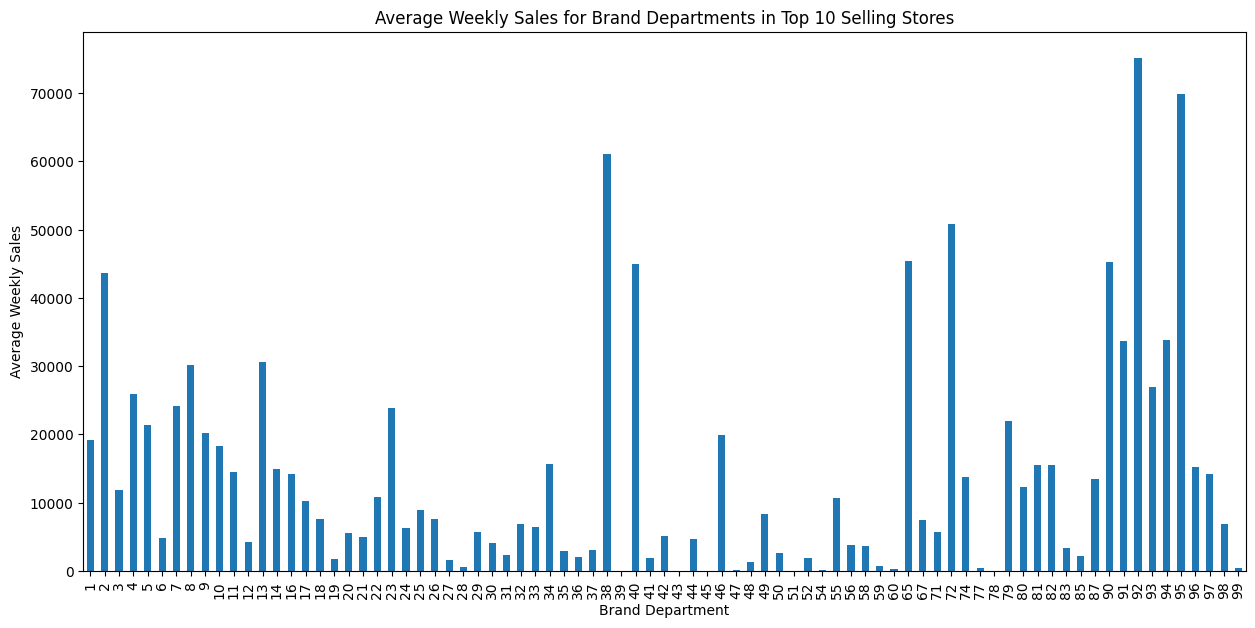

In [ ]:
#6. Create a chart that displays the average weekly sales for each brand department
#for the top 10 selling stores.
Top10Stores = superMerge.groupby('Store')['Weekly_Sales'].sum().nlargest(10).index
sales_data = superMerge[superMerge['Store'].isin(Top10Stores)]
AvgSales = superMerge.groupby(['Category'])['Weekly_Sales'].mean()
AvgSales.plot(kind='bar', figsize=(15, 7))
plt.title('Average Weekly Sales for Brand Departments in Top 10 Selling Stores')
plt.xlabel('Brand Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 7.  Make a line chart to show the relationship between weekly sales and weather
#    Temperature.
salesGrpDate=sales.groupby(['Date']).mean()
salesGrpDate=salesGrpDate.drop(columns=['Store', 'Category','Holiday'])
salesGrpDate=pd.DataFrame(salesGrpDate)
salesGrpDate

,Weekly_Sales
Date,
2010-02-05,16876.145176
2010-02-12,16390.912208
2010-02-19,16249.714685
2010-02-26,14940.686595
2010-03-05,15964.821240
...,...
2012-09-28,14815.621125
2012-10-05,16032.036903
2012-10-12,15484.696200


In [ ]:
weatherGrpDate=weather.groupby(['Date']).mean()
weatherGrpDate=weatherGrpDate.drop(columns=['Store'])
weatherGrpDate=pd.DataFrame(weatherGrpDate)
weatherGrpDate

,Temperature
Date,
2010-02-05,34.037333
2010-02-12,34.151333
2010-02-19,37.719778
2010-02-26,39.243556
2010-03-05,42.917333
...,...
2013-06-28,79.871111
2013-07-05,79.655778
2013-07-12,80.798667


In [ ]:
weatherSalesMerge=pd.merge(salesGrpDate,weatherGrpDate, how='inner', left_index=True, right_index=True)
weatherSalesMerge

,Weekly_Sales,Temperature
Date,,
2010-02-05,16876.145176,34.037333
2010-02-12,16390.912208,34.151333
2010-02-19,16249.714685,37.719778
2010-02-26,14940.686595,39.243556
2010-03-05,15964.821240,42.917333
...,...,...
2012-09-28,14815.621125,68.754444
2012-10-05,16032.036903,65.973111
2012-10-12,15484.696200,58.342667


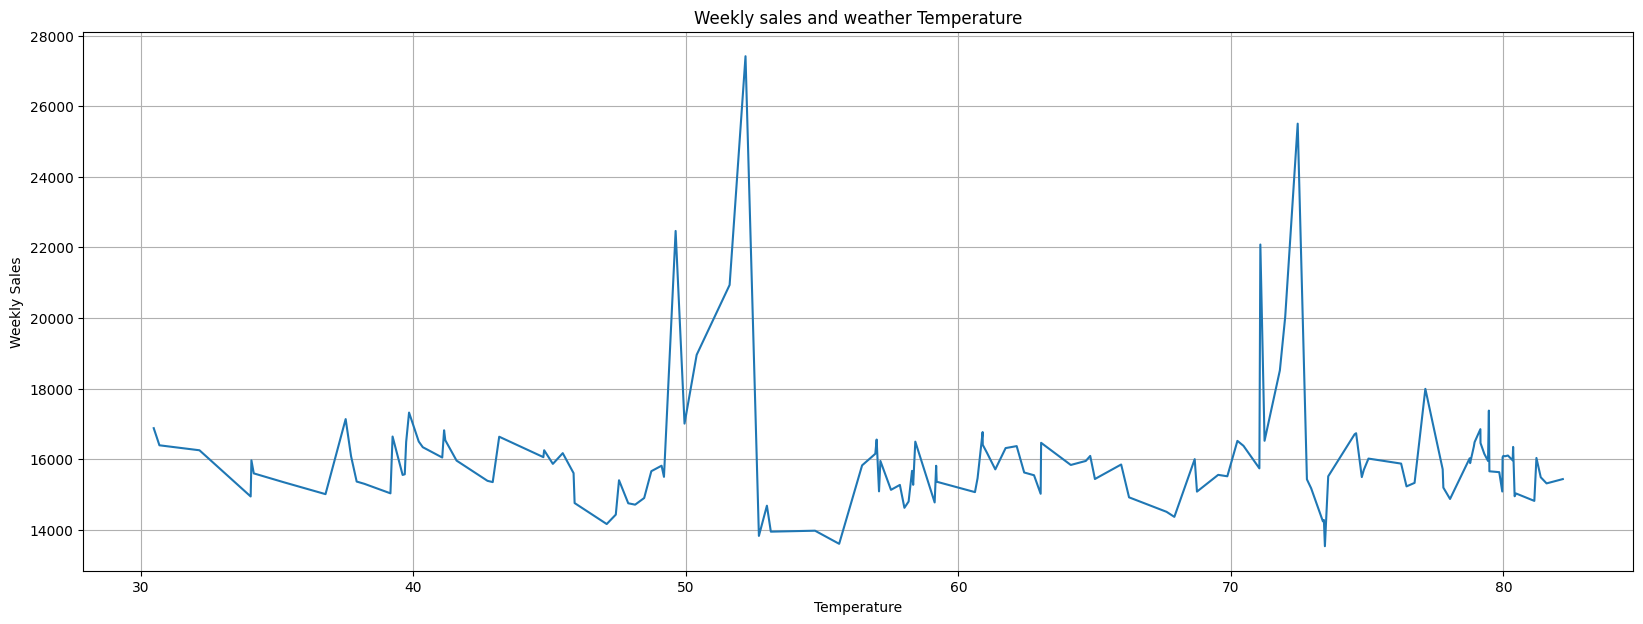

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(sorted(weatherSalesMerge['Temperature']),weatherSalesMerge['Weekly_Sales'])
plt.title('Weekly sales and weather Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

In [ ]:
FuelGrpDate=fuel.groupby(['Date']).mean()
FuelGrpDate=fuel.drop(columns=['Store'])
FuelGrpDate=pd.DataFrame(FuelGrpDate)
FuelGrpDate

,Date,Fuel_Price
0,2010-02-05,2.572
1,2010-02-12,2.548
2,2010-02-19,2.514
3,2010-02-26,2.561
4,2010-03-05,2.625
...,...,...
8185,2013-06-28,3.639
8186,2013-07-05,3.614
8187,2013-07-12,3.614
8188,2013-07-19,3.737


In [ ]:
FuelWeatherSalesMerge = pd.merge(FuelGrpDate, weatherSalesMerge, how='inner', on='Date')
FuelWeatherSalesMerge=FuelWeatherSalesMerge.drop_duplicates()

FuelWeatherSalesMerge

,Date,Fuel_Price,Weekly_Sales,Temperature
0,2010-02-05,2.572,16876.145176,34.037333
3,2010-02-05,2.598,16876.145176,34.037333
6,2010-02-05,2.580,16876.145176,34.037333
9,2010-02-05,2.962,16876.145176,34.037333
12,2010-02-05,2.666,16876.145176,34.037333
...,...,...,...,...
6402,2012-10-26,3.755,15433.541013,61.051111
6403,2012-10-26,3.882,15433.541013,61.051111
6404,2012-10-26,4.071,15433.541013,61.051111
6407,2012-10-26,3.917,15433.541013,61.051111


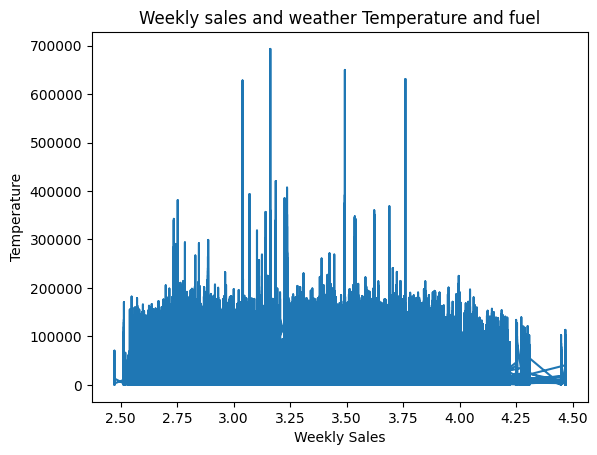

In [ ]:
#8. Make a line chart to show the relationship between the cost of fuel and weather
#   weekly sales.


FuelWeatherSalesMerge = superMerge[['Date', 'Fuel_Price', 'Weekly_Sales', 'Temperature']]


plt.plot(superMerge['Fuel_Price'], superMerge['Weekly_Sales'])
plt.title('Weekly sales and weather Temperature and fuel')
plt.xlabel('Weekly Sales')
plt.ylabel('Temperature')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


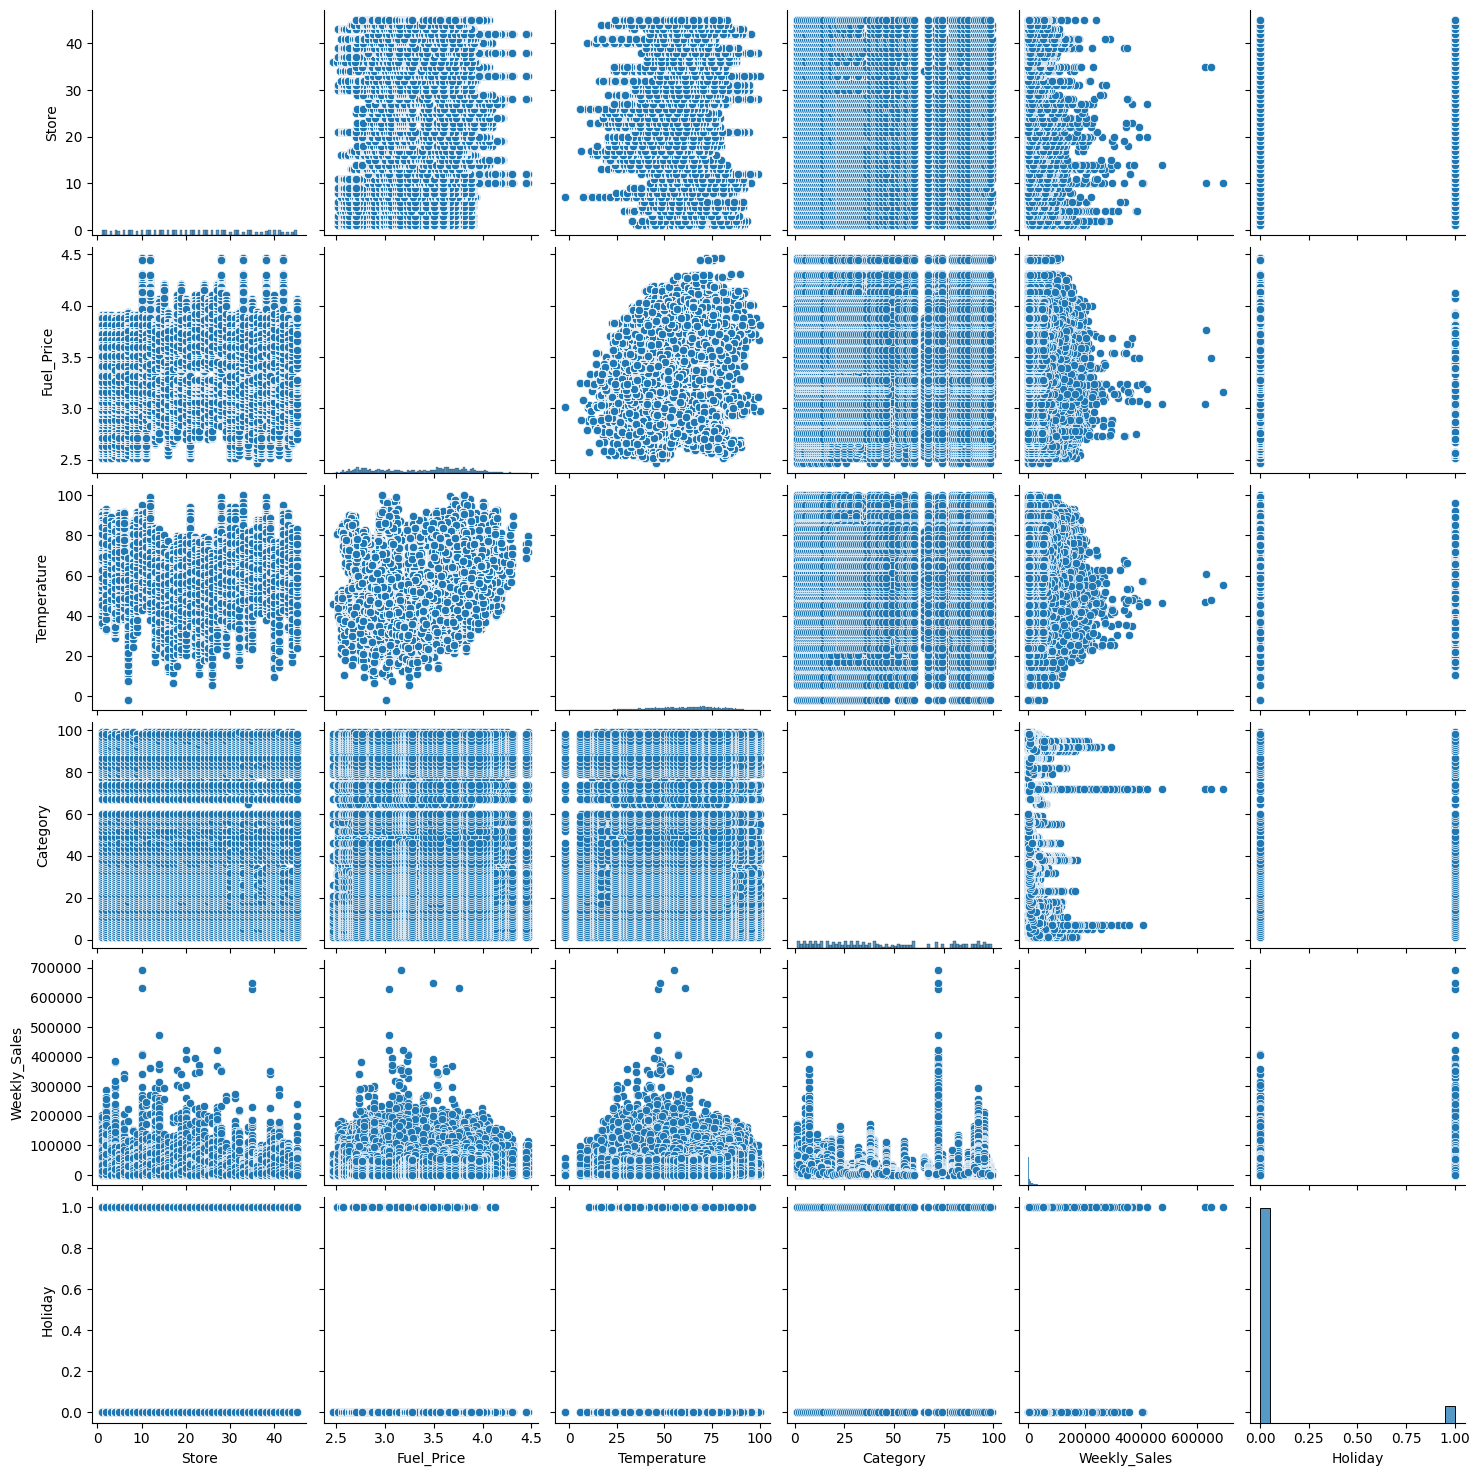

In [ ]:
#9. For each possible pair, create a pair plot to show different correlations.
sns.pairplot(superMerge)



# LinearRegression

In [ ]:
superMerge['year']= superMerge['Date'].dt.year
superMerge['month']= superMerge['Date'].dt.month
superMerge['day']= superMerge['Date'].dt.day
superMerge
#Will need the splited columns in modeling

,Store,Date,Fuel_Price,Temperature,Category,Weekly_Sales,Holiday,year,month,day
0,1,2010-02-05,2.572,42.31,1,24924.50,False,2010,2,5
1,1,2010-02-05,2.572,42.31,2,50605.27,False,2010,2,5
2,1,2010-02-05,2.572,42.31,3,13740.12,False,2010,2,5
3,1,2010-02-05,2.572,42.31,4,39954.04,False,2010,2,5
4,1,2010-02-05,2.572,42.31,5,32229.38,False,2010,2,5
...,...,...,...,...,...,...,...,...,...,...
420280,45,2012-10-26,3.882,58.85,93,2487.80,False,2012,10,26
420281,45,2012-10-26,3.882,58.85,94,5203.31,False,2012,10,26
420282,45,2012-10-26,3.882,58.85,95,56017.47,False,2012,10,26
420283,45,2012-10-26,3.882,58.85,97,6817.48,False,2012,10,26


In [ ]:
superMerge.head()

,Store,Date,Fuel_Price,Temperature,Category,Weekly_Sales,Holiday,year,month,day
0,1,2010-02-05,2.572,42.31,1,24924.50,False,2010,2,5
1,1,2010-02-05,2.572,42.31,2,50605.27,False,2010,2,5
2,1,2010-02-05,2.572,42.31,3,13740.12,False,2010,2,5
3,1,2010-02-05,2.572,42.31,4,39954.04,False,2010,2,5
4,1,2010-02-05,2.572,42.31,5,32229.38,False,2010,2,5


In [ ]:
superMerge.columns

Index(['Store', 'Date', 'Fuel_Price', 'Temperature', 'Category',
       'Weekly_Sales', 'Holiday', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
#df1=superMerge[['Store', 'Fuel_Price',  'year']]
#df2=superMerge['Weekly_Sales']
#15155.831358481286 <- if we don't want to put all the features but it will be less acurate bit not by alot

In [ ]:
df1=superMerge[['Store', 'Fuel_Price', 'Temperature', 'Category',
       'Holiday', 'year', 'month']]
df2=superMerge['Weekly_Sales']

#15150.693231366273

In [ ]:
X =df1
y = df2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.03016432319157525

In [ ]:
mean_absolute_error(y_test, y_pred)

15150.693231366273

In [ ]:
mean_squared_error(y_test, y_pred)


504526705.62741065

# Some Drawing to understand the model more

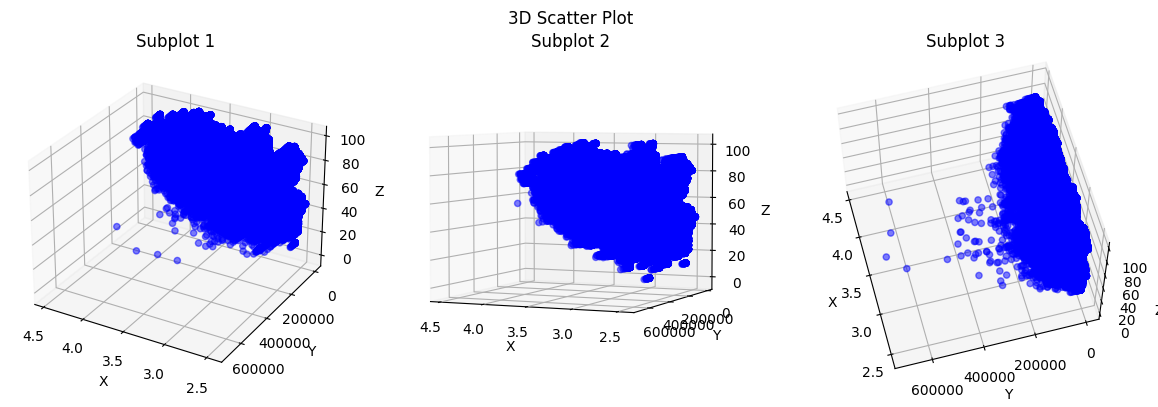

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define your data
x =  superMerge[ 'Fuel_Price']
y = superMerge['Weekly_Sales']
z =  superMerge[ 'Temperature']

# Create a figure and subplots
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

# Iterate over subplots and plot the data
for ax in axes:
    ax.scatter(x, y, z, c='b', marker='o', alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Set the viewing angles for each subplot
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

# Add titles and adjust layout
ax1.set_title('Subplot 1')
ax2.set_title('Subplot 2')
ax3.set_title('Subplot 3')
fig.suptitle('3D Scatter Plot')
fig.tight_layout()

# Show the plot
plt.show()


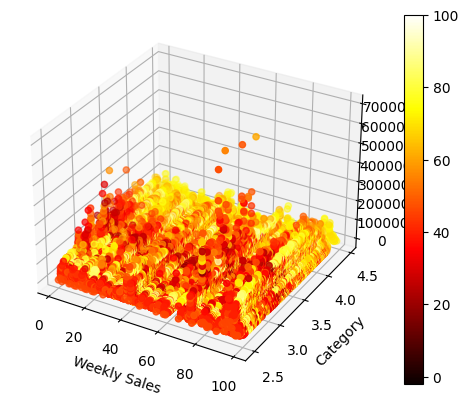

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = superMerge['Category']
y = superMerge['Fuel_Price']
z = superMerge['Weekly_Sales']
c = superMerge['Temperature']

img = ax.scatter(x, y, z, c=c, cmap='hot')
fig.colorbar(img)
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Category')
ax.set_zlabel('Temperature')

plt.show()


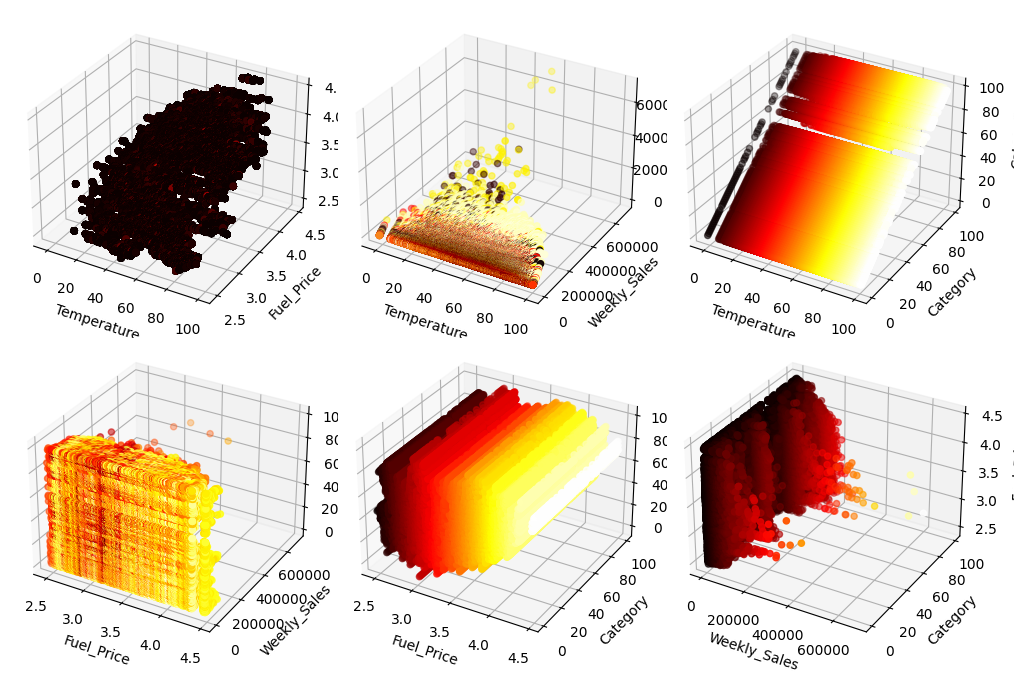

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def plot_3d_pairplot(data, features):
    num_features = len(features)
    fig = plt.figure(figsize=(10, 10))

    index = 1
    for i in range(num_features):
        for j in range(i+1, num_features):
            ax = fig.add_subplot(num_features-1, num_features-1, index, projection='3d')
            ax.scatter(data[features[i]], data[features[j]], data[features[(i+j) % num_features]], c=data[features[(i+j+1) % num_features]], cmap='hot')
            ax.set_xlabel(features[i])
            ax.set_ylabel(features[j])
            ax.set_zlabel(features[(i+j) % num_features])
            index += 1

    plt.tight_layout()
    plt.show()

# Define the list of features to visualize
features = ['Temperature', 'Fuel_Price', 'Weekly_Sales', 'Category']

# Generate the 3D pairplot
plot_3d_pairplot(superMerge, features)


# Decision Tree Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Plot Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt
# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
DT=pd.DataFrame(superMerge)
DT = superMerge.drop('Date', axis=1)


In [ ]:
DT.head()

,Store,Fuel_Price,Temperature,Category,Weekly_Sales,Holiday,year,month,day
0,1,2.572,42.31,1,24924.50,False,2010,2,5
1,1,2.572,42.31,2,50605.27,False,2010,2,5
2,1,2.572,42.31,3,13740.12,False,2010,2,5
3,1,2.572,42.31,4,39954.04,False,2010,2,5
4,1,2.572,42.31,5,32229.38,False,2010,2,5


In [ ]:
DT.columns


Index(['Store', 'Fuel_Price', 'Temperature', 'Category', 'Weekly_Sales',
       'Holiday', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
DT['Holiday'].value_counts()


False    390722
True      29563
Name: Holiday, dtype: int64

In [ ]:
DT['Holiday'] = DT['Holiday'].replace(False, 0)
DT['Holiday'] = DT['Holiday'].replace(True, 1)

DT[ 'Holiday']=pd.to_numeric(DT[ 'Holiday'], errors='coerce')


In [ ]:
DT.head()

,Store,Fuel_Price,Temperature,Category,Weekly_Sales,Holiday,year,month,day
0,1,2.572,42.31,1,24924.50,0,2010,2,5
1,1,2.572,42.31,2,50605.27,0,2010,2,5
2,1,2.572,42.31,3,13740.12,0,2010,2,5
3,1,2.572,42.31,4,39954.04,0,2010,2,5
4,1,2.572,42.31,5,32229.38,0,2010,2,5


In [ ]:
X = DT.drop(columns = ['Holiday'])
y = DT['Holiday'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
# Train and fit the model
dt_clf = DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
dt_pred = dt_clf.predict(X_test)
print(dt_pred)


[0 0 0 ... 0 0 0]


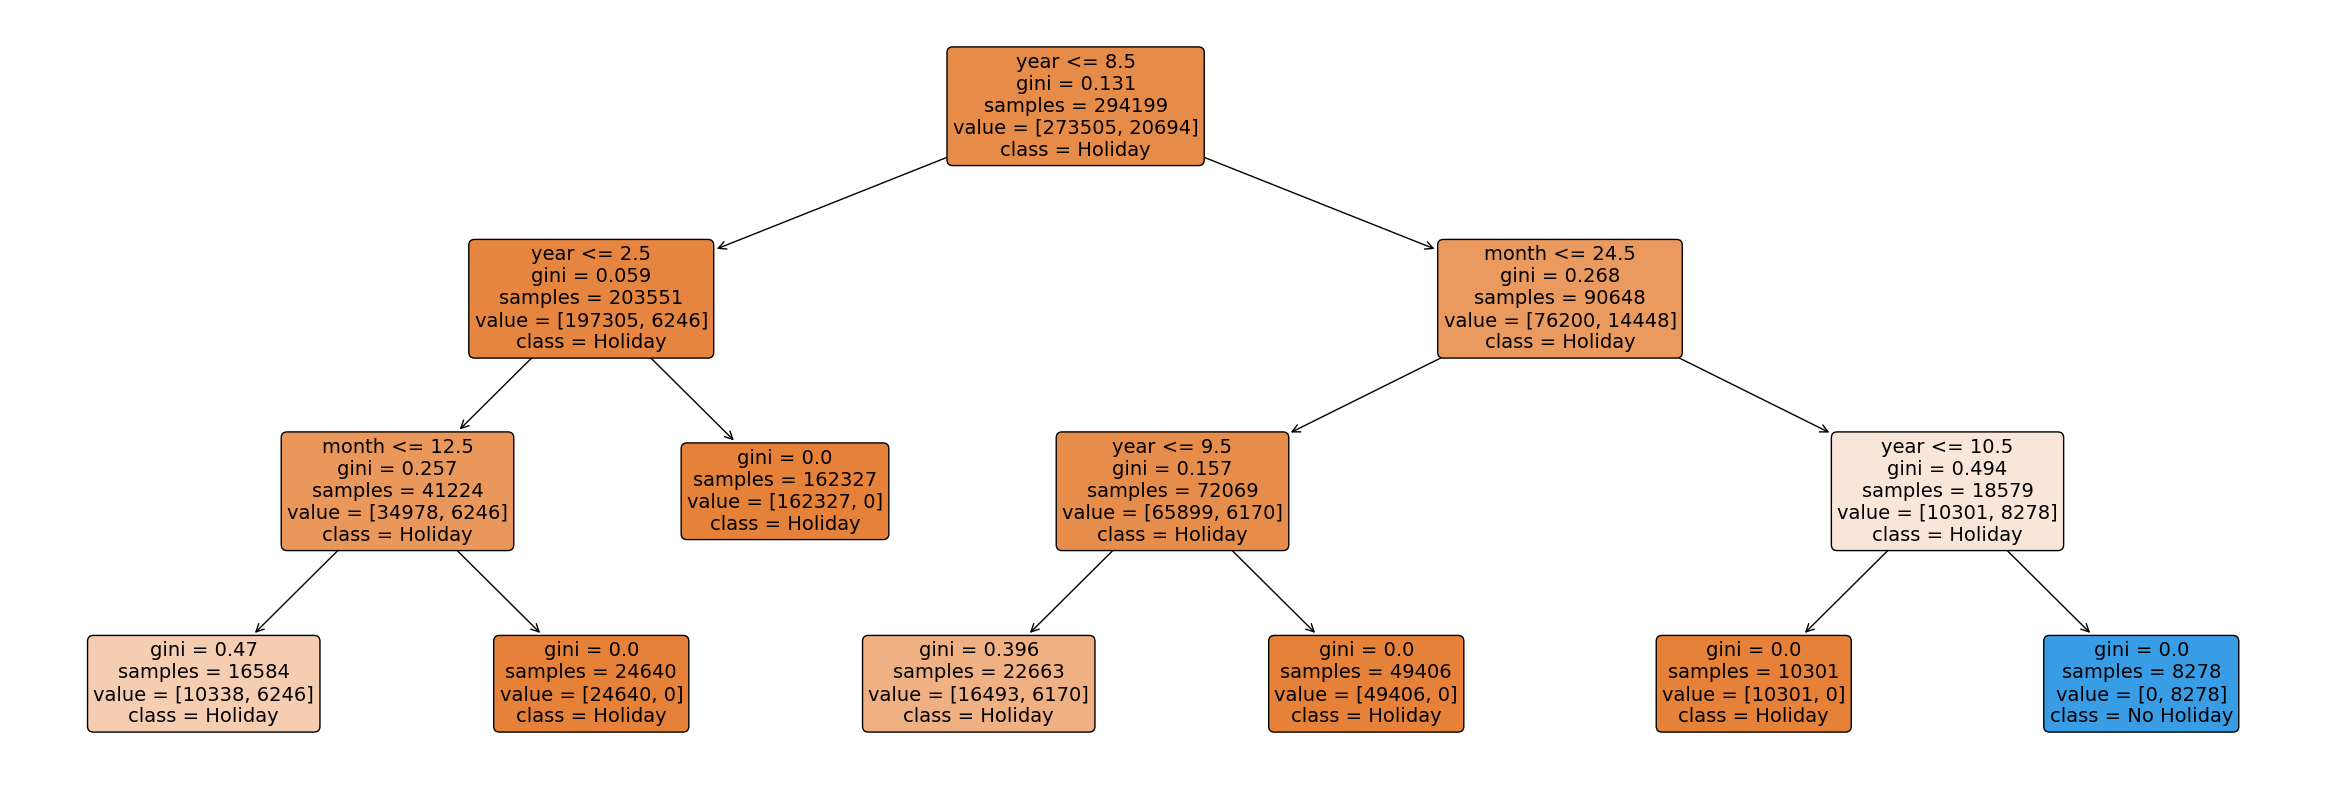

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='white')
#create the tree plot
a = tree.plot_tree(dt_clf,
                   #use the feature names stored
                   feature_names = DT.columns[:-1],
                   #use the class names stored
                   class_names = ['Holiday', 'No Holiday'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
accuracy_score(y_test, dt_pred)

0.9580365782085244

In [ ]:
dt_pred_train = dt_clf.predict(X_train)
dt_pred_train
accuracy_score(y_train, dt_pred_train)

0.9577972732742124

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X=superMerge[['Store', 'Fuel_Price', 'Temperature', 'Category',
       'Holiday', 'year', 'month']]
y=superMerge['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9611087969631003

In [ ]:
y_pred = rf_regressor.predict(X_test)
y_pred

array([43443.0297,  1728.22  ,   532.5328, ...,  7112.1481, 25074.7417,
       12381.0527])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

20231933.11537634


we can clearly see that the Random Forest is more accurate by a lot as the R2 hear is 96 and in Linear Regression is 0.03


# kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

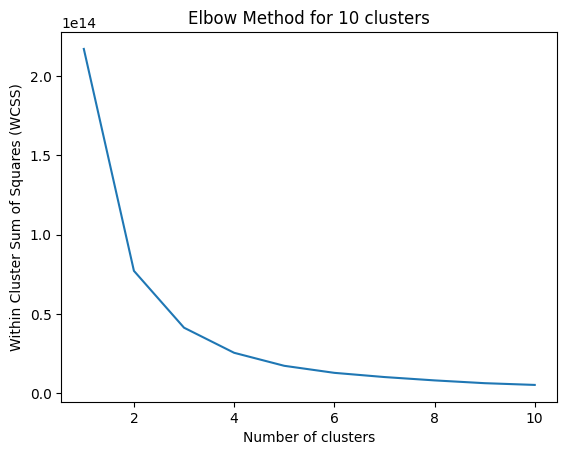

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = superMerge[['Weekly_Sales','Category','Store']]

inertias = []
clusters = range(1, 11)

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig = sns.lineplot(x=clusters, y=inertias)
fig.set(title=f'Elbow Method for {len(clusters)} clusters')
fig.set_xlabel('Number of clusters')
fig.set_ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()


we can see the graph is between 3 and 2

so we will choose 2 or 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Category', ylabel='Weekly_Sales'>

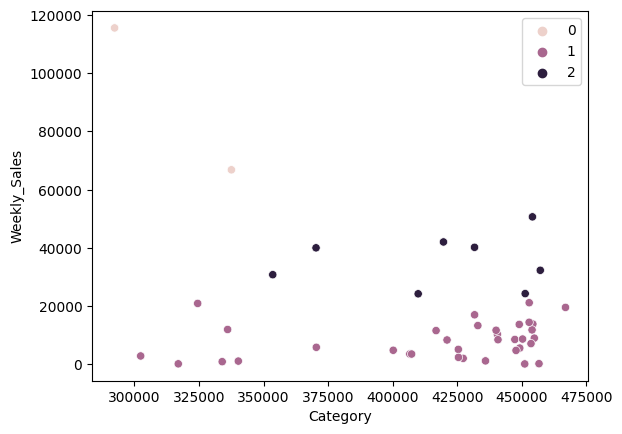

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
preds = kmeans.predict(X)
grouped_data = superMerge.groupby('Store')['Category'].sum()

sns.scatterplot(x=grouped_data, y=superMerge['Weekly_Sales'], hue=preds)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Category', ylabel='Weekly_Sales'>

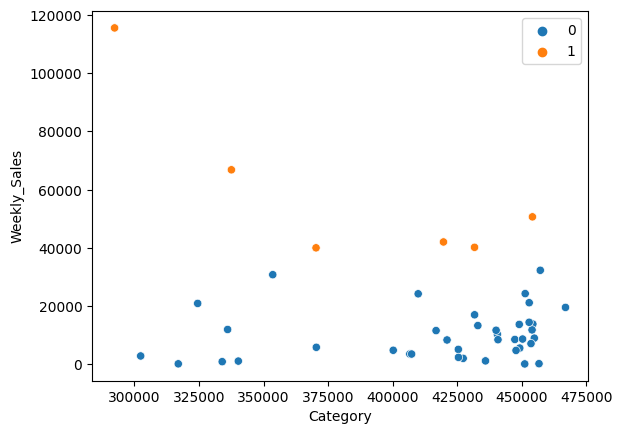

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
preds = kmeans.predict(X)
grouped_data = superMerge.groupby('Store')['Category'].sum()

sns.scatterplot(x=grouped_data, y=superMerge['Weekly_Sales'], hue=preds)

# 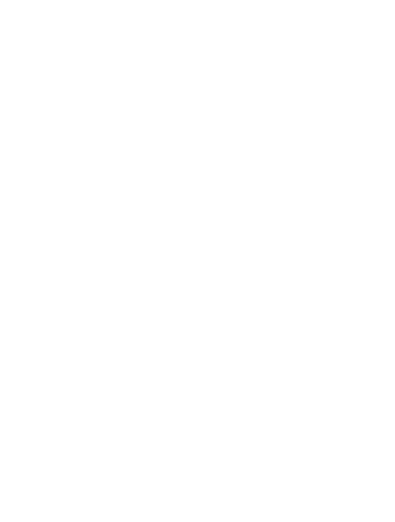